In [20]:
%matplotlib widget

from struct import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
def ucitavanje_slika(putanja):
    with open(putanja, "rb") as fp:
        magic_number = unpack(">I", fp.read(4))
        broj_slika = unpack(">I", fp.read(4))[0]
        broj_redova = unpack(">I", fp.read(4))[0]
        broj_kolona = unpack(">I", fp.read(4))[0]
        
        slike = np.frombuffer(fp.read(broj_slika*broj_redova*broj_kolona), dtype=np.uint8).reshape((broj_slika, broj_redova, broj_kolona))

        return slike

def ucitavanje_labela(putanja):
    with open(putanja, "rb") as fp:
        magic_number = unpack(">I", fp.read(4))
        broj_labela = unpack(">I", fp.read(4))[0]
        labele = np.frombuffer(fp.read(broj_labela), dtype=np.uint8)
        return labele

In [43]:
train_slike = ucitavanje_slika("train-images.idx3-ubyte")
train_labele = ucitavanje_labela("train-labels.idx1-ubyte")

test_slike = ucitavanje_slika("t10k-images.idx3-ubyte")
test_labele = ucitavanje_labela("t10k-labels.idx1-ubyte")

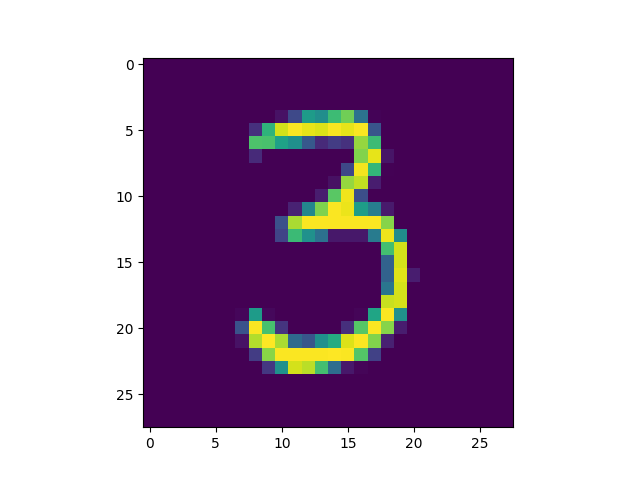

In [44]:
plt.figure()
plt.imshow(slike[50])
plt.show()

In [45]:
train_vektori = []
for slika in train_slike:
    train_vektori.append(slika.flatten())

In [47]:
test_vektori = []
for slika in test_slike:
    test_vektori.append(slika.flatten())

In [48]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state=5)
perceptron.fit(train_vektori, train_labele)


Perceptron(random_state=5)

In [49]:
perceptron.score(test_vektori, test_labele)

0.8697

In [50]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=5)
logreg.fit(train_vektori, train_labele)

logreg.score(test_vektori, test_labele)

e:\singidunum\materijali\ml-okruzenje\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9255

In [52]:
perceptron.predict([test_vektori[0], test_vektori[1]])

array([7, 2], dtype=uint8)

In [53]:
logreg.predict([test_vektori[0], test_vektori[1]])

array([7, 2], dtype=uint8)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(60000)
knn.fit(train_vektori, train_labele)
knn.score(test_vektori, test_labele)

0.1135